### COVID-19 
### UPDATE by DAY in the countries: 
#### CHINA, GERMANY, ITALY, KOREA, JAPAN, USA, AUSTRALIA, LUXEMBOURG, UK, CANADA, VIETNAM
#### (Start recorded day: 22.01.2020)

In [1]:
from covid import *
%matplotlib inline

Start importing World-data  ./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 6
len(data)

393

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'02-17-2021'

### Number of the infected countries in the first outbreak day

In [4]:
infected_countries_earliest, num_infected_countries[0]

(array(['Japan', 'Macau', 'Mainland China', 'South Korea', 'Taiwan',
        'Thailand', 'US'], dtype=object),
 7)

### Number of the infected countries in the latest outbreak day

In [5]:
infected_countries_latest, num_infected_countries[-1]

(array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
        'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
        'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
        'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
        'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
        'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
        "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
        'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
        'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
        'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
        'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
        'Grenada', 'Gu

### Number of the infected countries changed by day

Text(0, 0.5, 'Number of countries in log_values')

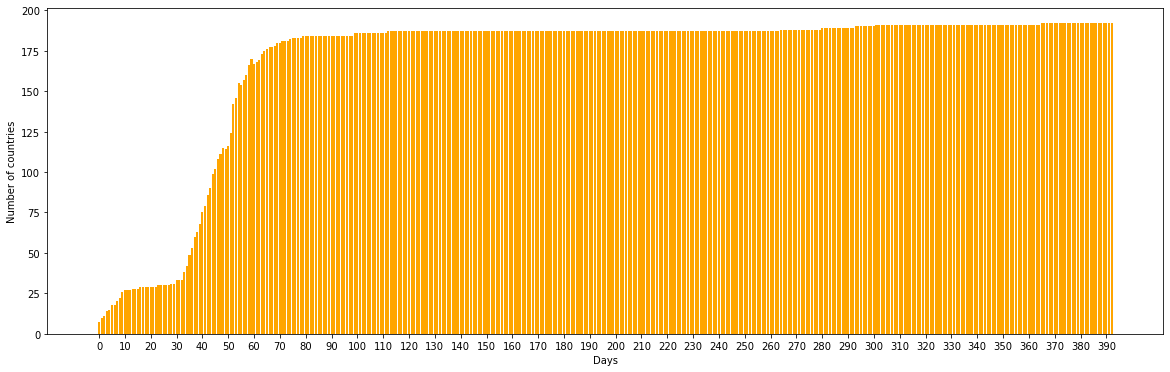

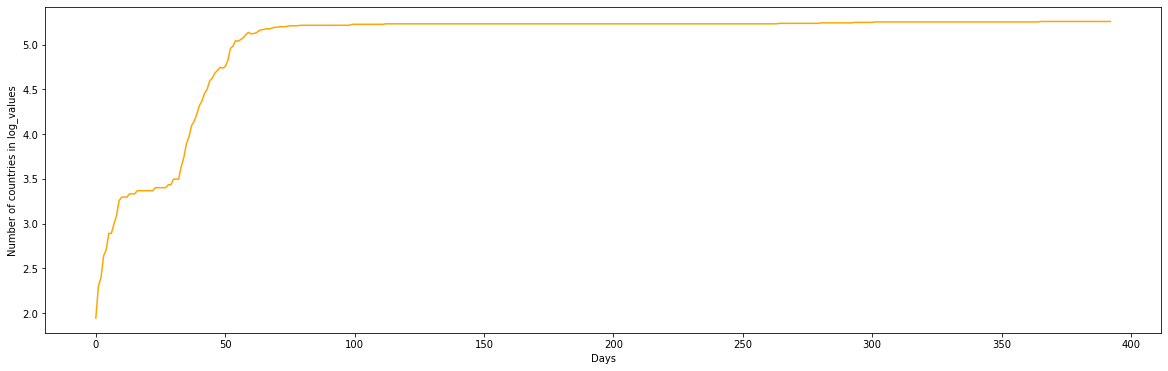

In [6]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, num_infected_countries, color='orange')
plt.xlabel('Days')
plt.ylabel('Number of countries')
('Increasing', num_infected_countries[-1]-num_infected_countries[-2])

plt.figure(2)
plt.plot(x_dat, np.log(num_infected_countries), color='orange', label="New Cases by day in log_values")
plt.xlabel('Days')
plt.ylabel('Number of countries in log_values')

### New cases in the World changed by day

Last day Increasing 395451


/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


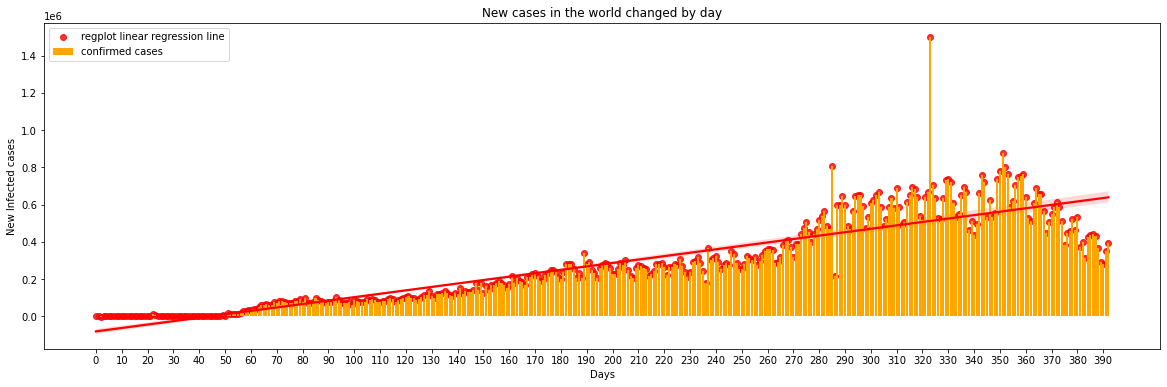

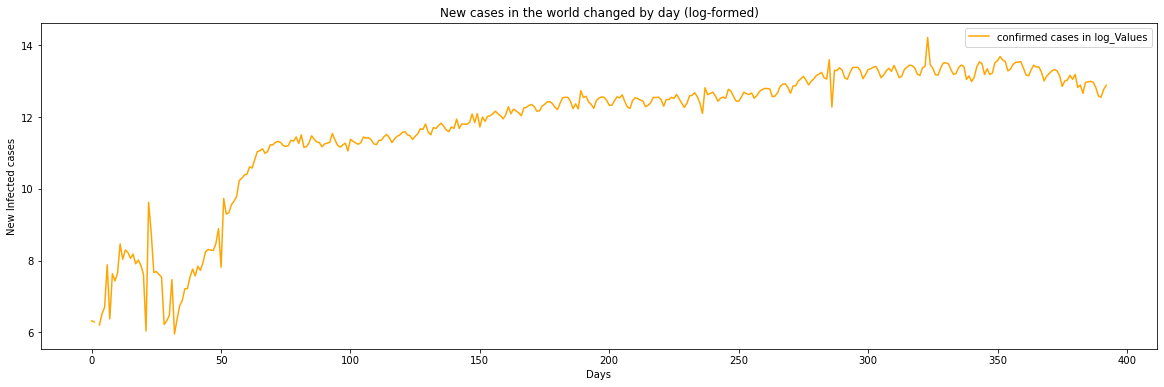

In [13]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, newCasesByDay, color='orange', label='confirmed cases')
plt.xlabel('Days')
plt.ylabel('New Infected cases')
plt.title("New cases in the world changed by day")
plt.legend()
print('Last day Increasing', newCasesByDay[-1])
ax = sns.regplot(x=x_dat, y=newCasesByDay, ci=95, label="regplot linear regression line", color='red')
# ax2 = sns.regplot(x=x_dat, y=newCasesByDay, ci=10, label="regplot linear regression line", color='lightblue')
ax.legend(loc="upper left")

plt.figure(2)
plt.plot(x_dat, np.log(newCasesByDay), color='orange', label='confirmed cases in log_Values')
plt.xlabel('Days')
plt.ylabel('New Infected cases')
plt.title("New cases in the world changed by day (log-formed)")
plt.legend()

### Total CONFIRMED_vs_RECOVERED_vs_FATALITIES cases in the World changed by day

(('Total Confirmed', 109902859),
 ('Total Recovered', 73707506.0),
 ('Total Fatalities', 2430189),
 ('Remaining', 33765164.0))

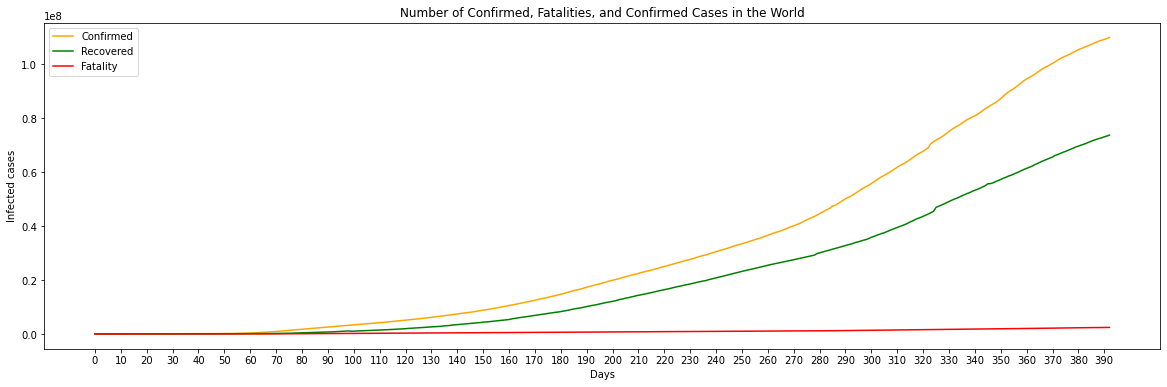

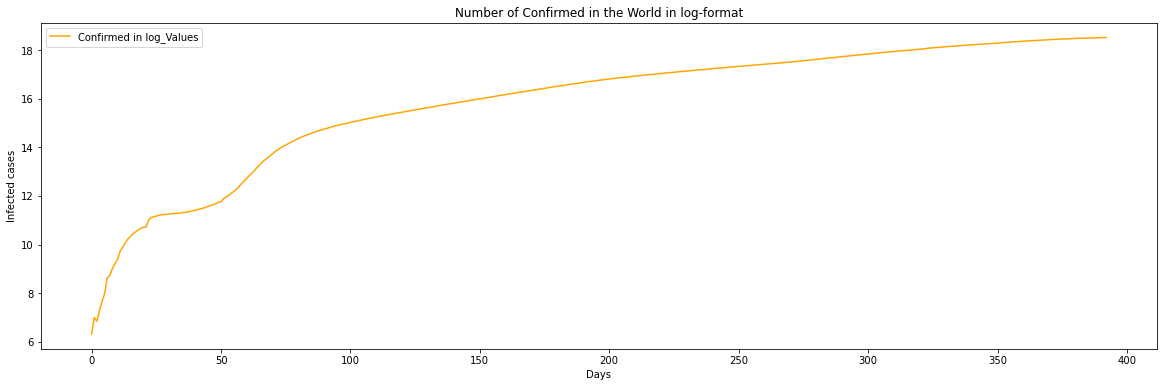

In [8]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, totalconfirmed_by_day, color='orange', label='Confirmed')
plt.plot(x_dat, totalrecovered_by_day, color='green', label='Recovered')
plt.plot(x_dat, totalfatalities_by_day, color='red', label='Fatality')
plt.xlabel('Days')
plt.ylabel('Infected cases')
plt.title("Number of Confirmed, Fatalities, and Confirmed Cases in the World")
plt.legend()

plt.figure(2)
plt.plot(x_dat, np.log(totalconfirmed_by_day), color='orange', label='Confirmed in log_Values')
plt.xlabel('Days')
plt.ylabel('Infected cases')
plt.title("Number of Confirmed in the World in log-format")
plt.legend()

('Total Confirmed', totalconfirmed_by_day[-1]), ('Total Recovered', totalrecovered_by_day[-1]), ('Total Fatalities', totalfatalities_by_day[-1]), ('Remaining', totalconfirmed_by_day[-1]-totalrecovered_by_day[-1]-totalfatalities_by_day[-1])

### Number of infected cases changed by day in the countries
### China, Germany, Italy, South Korea, Japan, US, Australia, Luxembourg, UK, Canada, Vietnam

NUMBER OF INFECTED CASES IN THE FIRST DAY in the following countries: 

China 31
Germany 0
Italy 0
Korea, South 0
Japan 1
Australia 0
Luxembourg 0
US 1
United Kingdom 0
Canada 0
Vietnam 0


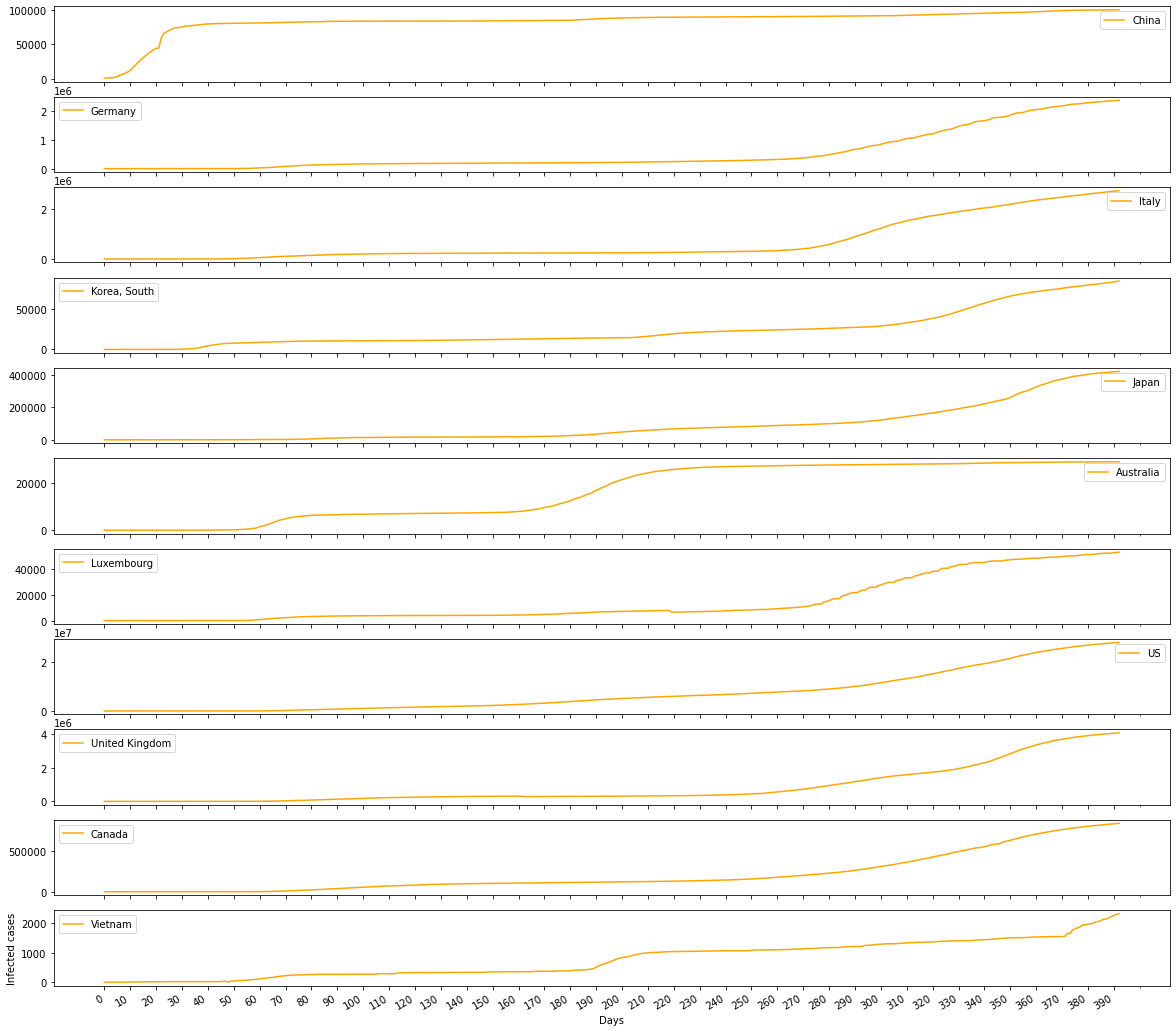

In [21]:
countries = ['China', 'Germany', 'Italy', 'Korea, South', 'Japan', 'Australia', 'Luxembourg', 'US', 'United Kingdom', 'Canada', 'Vietnam']

rcParams['figure.figsize'] = 20, 20
countries_confirmed[countries].plot(subplots=True, legend=True, color='orange')

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.xlabel('Days')
plt.ylabel('Infected cases')
plt.legend()

print("NUMBER OF INFECTED CASES IN THE FIRST DAY in the following countries: \n")
for country in countries:
    print(country, StartML.searchByValue(data[0], try_keys=['Country/Region'], value=country).shape[0])

### Number of CONFIRMED_vs_RECOVERED_vs_FATALITY cases changed by day in these countries

,China,Germany,Italy,"Korea, South",Japan,Australia,Luxembourg,US,United Kingdom,Canada,Vietnam
Last day Increasing,27,9598,12066,621,1461,1,267,70188.0,12760,2561,18
Total Confirmed,100666,2362364,2751657,85567,419896,28912,53329,27826812.0,4083092,839155,2329
Total Recovered,94960,2172312,2268253,75896,391052,26134,49994,11828030.0,11099,785508,1574
Total Fatalities,4833,66732,94540,1544,7218,909,616,490540.0,119159,21439,35
Remaining,873,123320,388864,8127,21626,1869,2719,15508242.0,3952834,32208,720


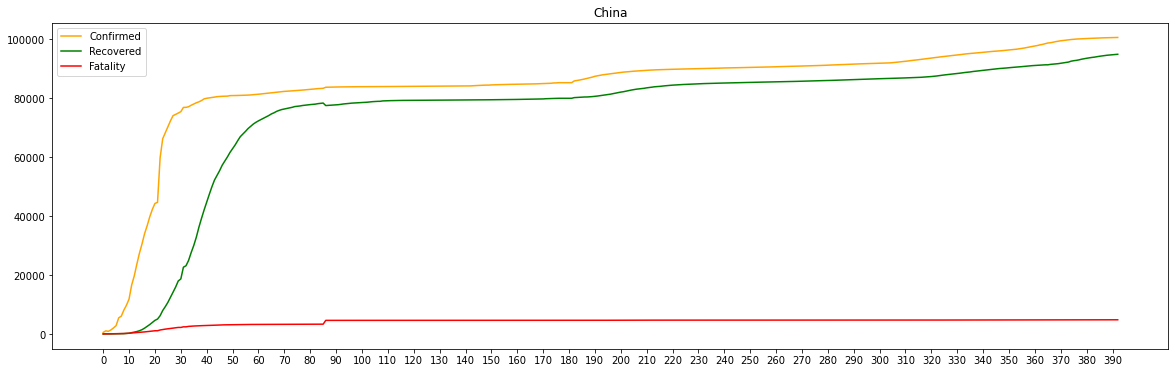

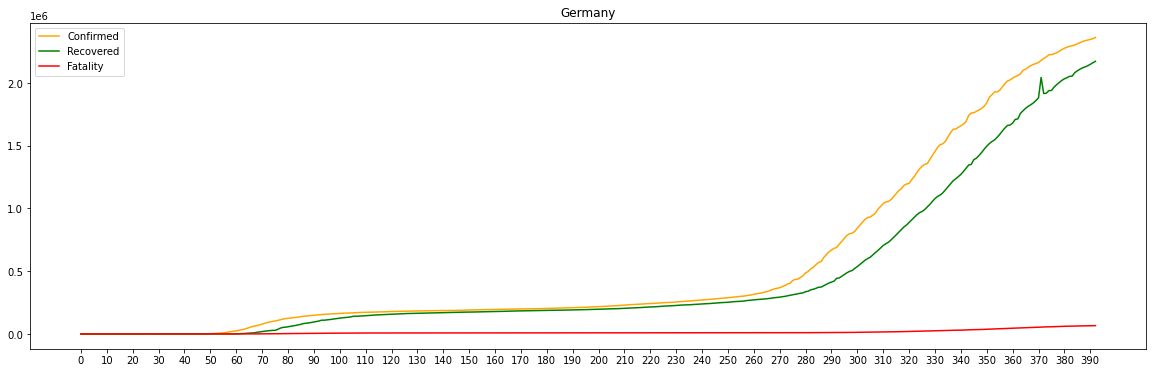

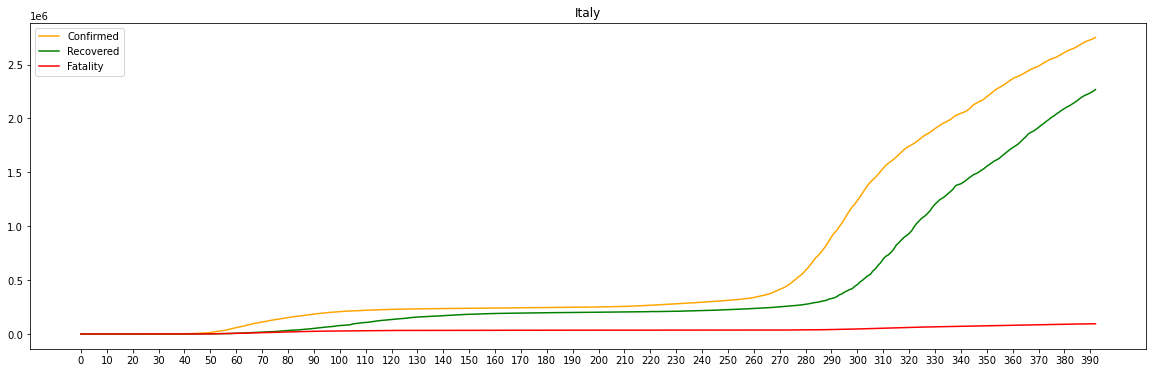

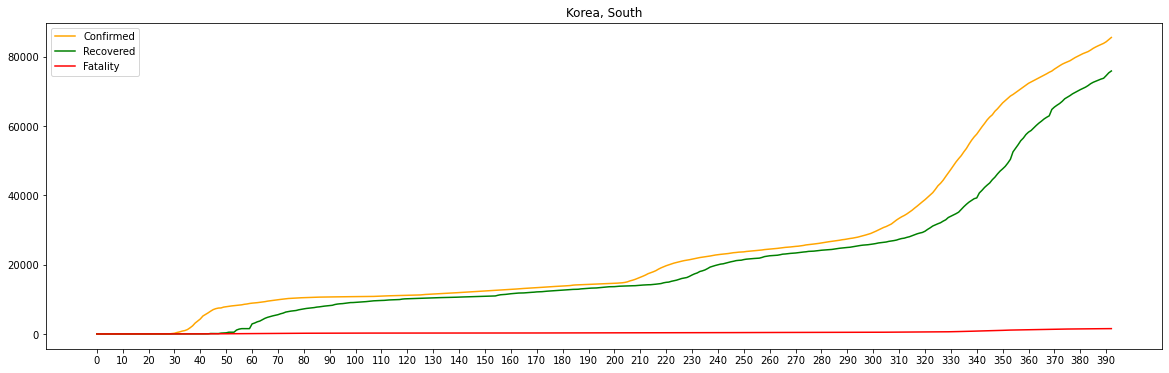

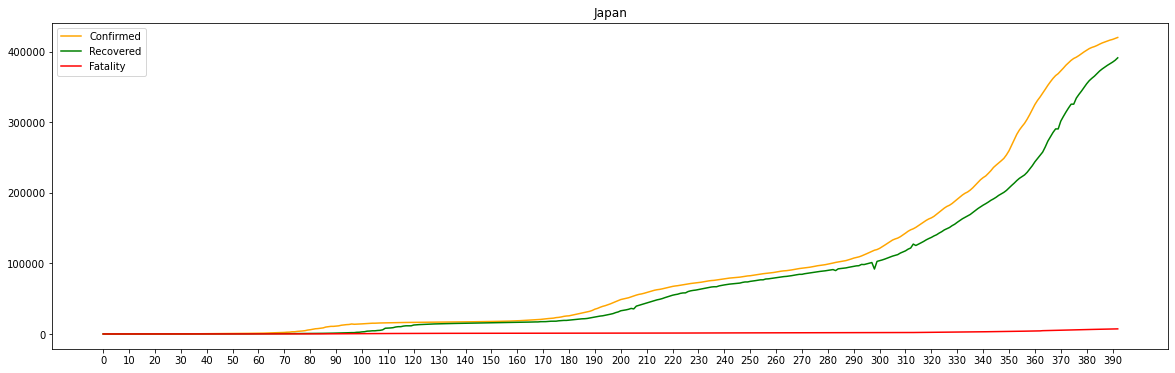

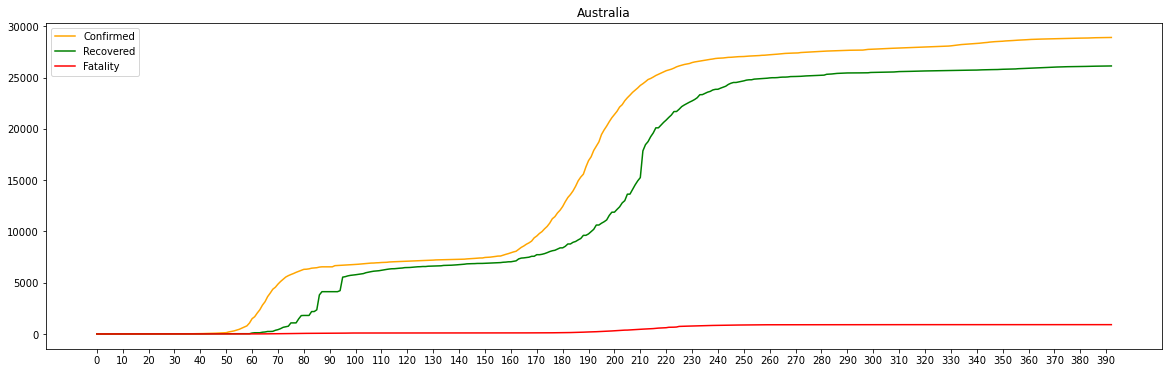

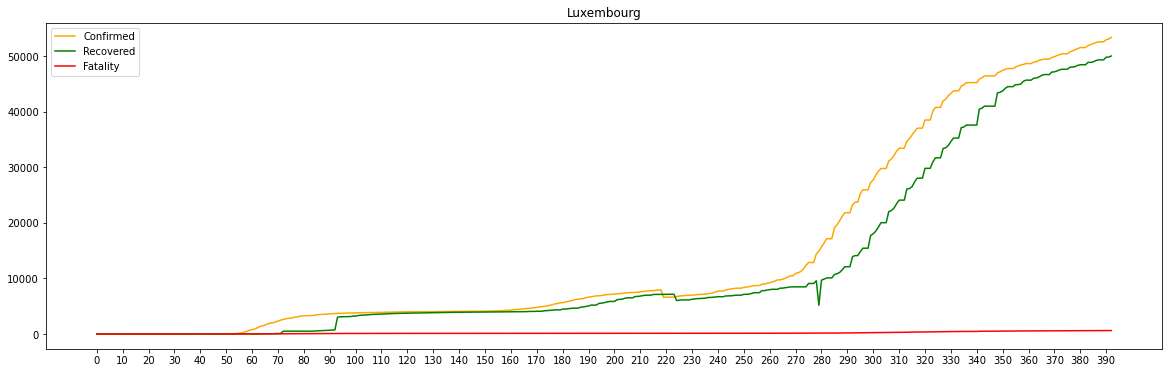

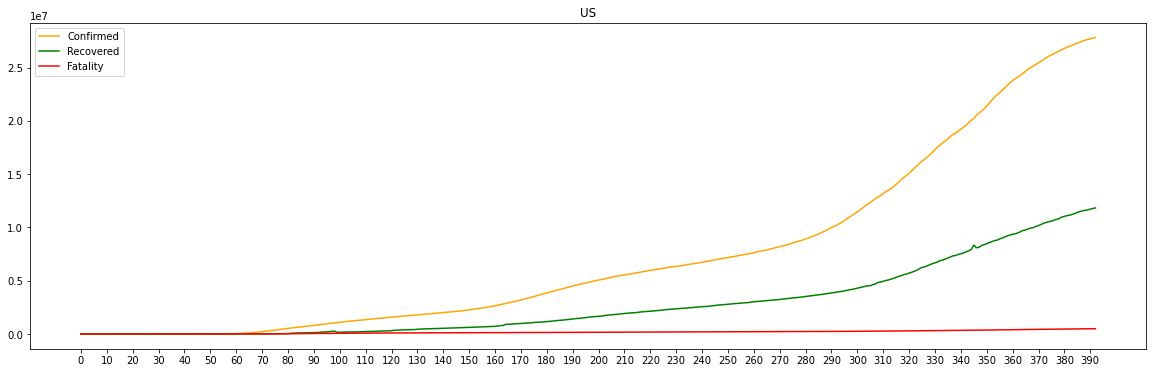

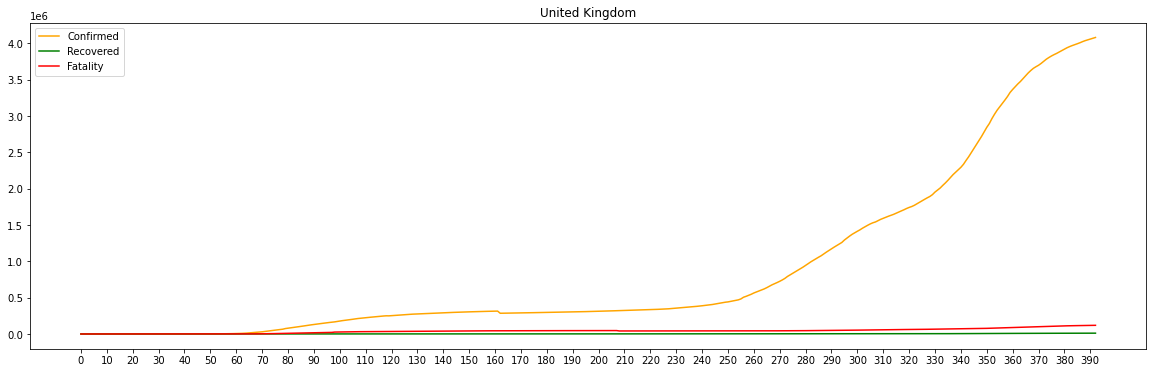

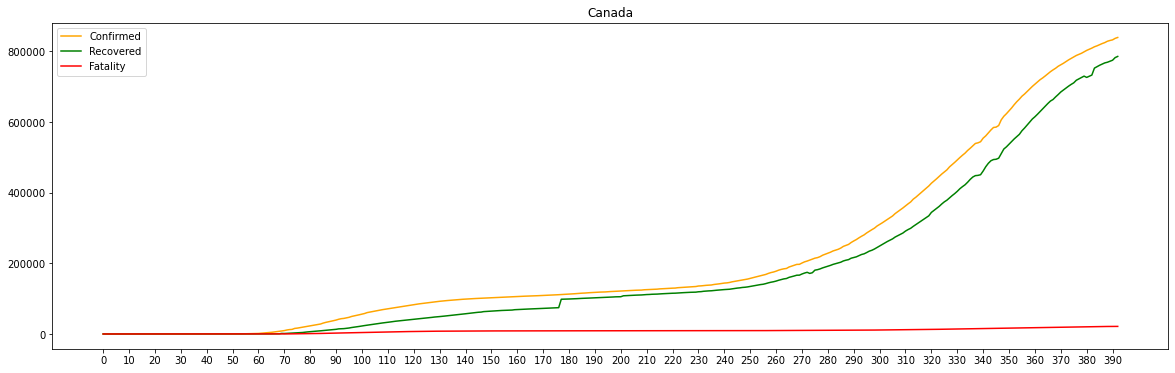

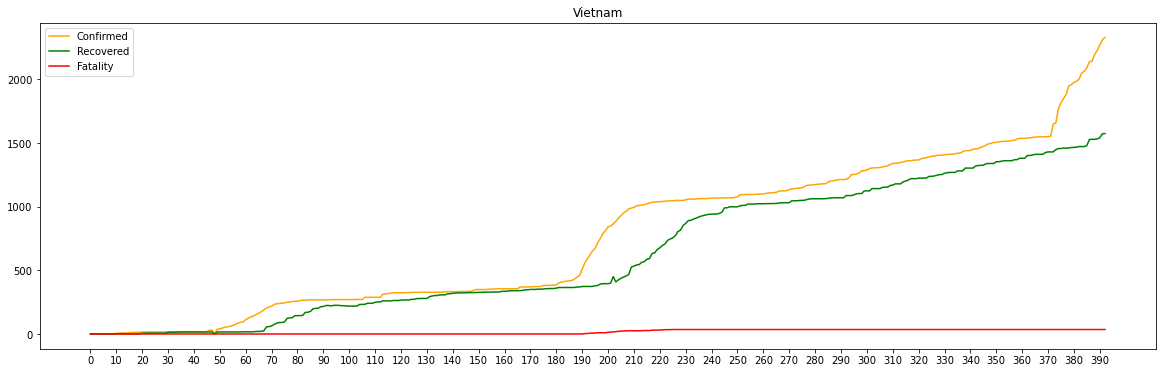

In [10]:
rcParams['figure.figsize'] = 20, 6

countriesdf = pd.DataFrame(columns=countries, index=['Last day Increasing', 'Total Confirmed', 'Total Recovered', 'Total Fatalities', 'Remaining'])
for country in countries:
    countriesdf[country] = [all_countries['Confirmed'][country][-1]-all_countries['Confirmed'][country][-2], all_countries['Confirmed'][country][-1], all_countries['Recovered'][country][-1],  
                          all_countries['Deaths'][country][-1], all_countries['Confirmed'][country][-1]-all_countries['Recovered'][country][-1]-all_countries['Deaths'][country][-1]]

figure = 1
for country in countries:
    plt.figure(figure)
    plt.xticks(np.arange(0, max(x_dat)+1, 10))
    plt.plot(x_dat, all_countries['Confirmed'][country], color='orange', label='Confirmed')
    plt.plot(x_dat, all_countries['Recovered'][country], color='green', label='Recovered')
    plt.plot(x_dat, all_countries['Deaths'][country], color='red', label='Fatality')
    plt.title(country)
    plt.legend()    
    figure = figure+1
    
countriesdf

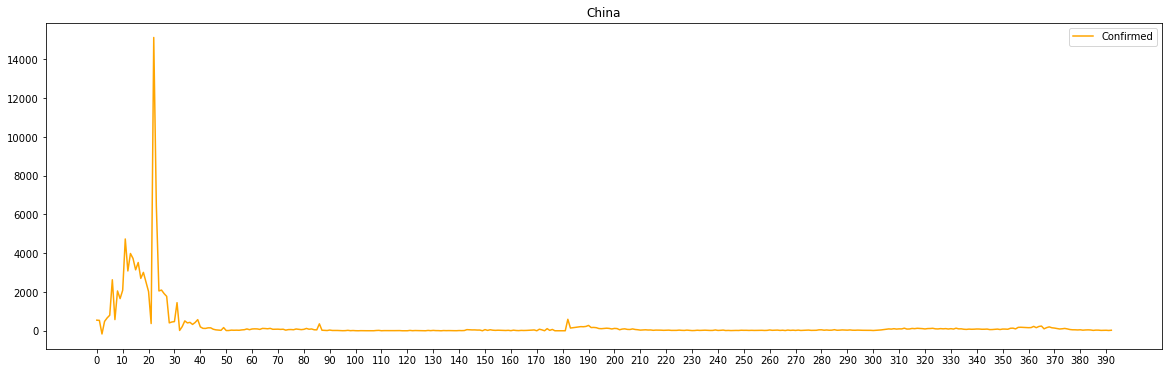

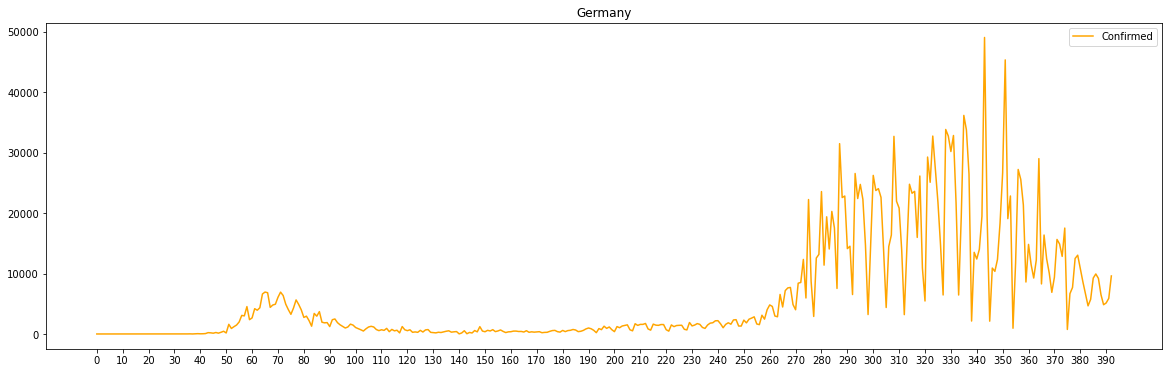

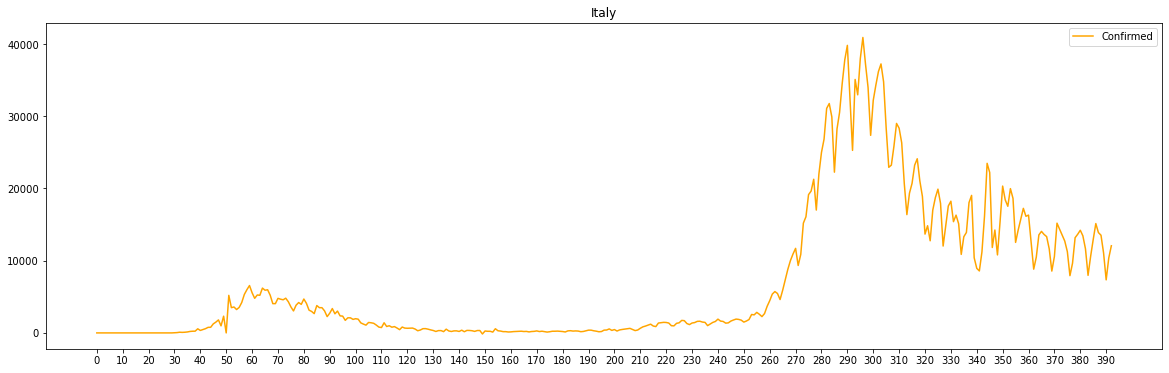

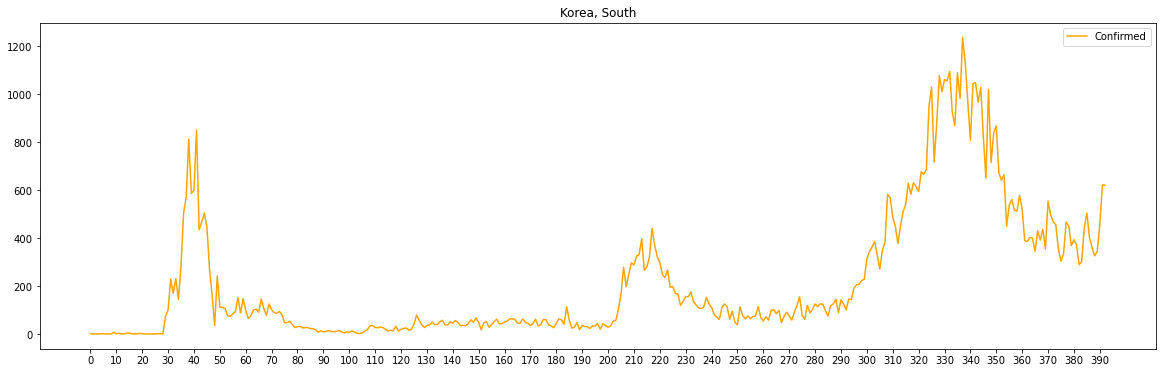

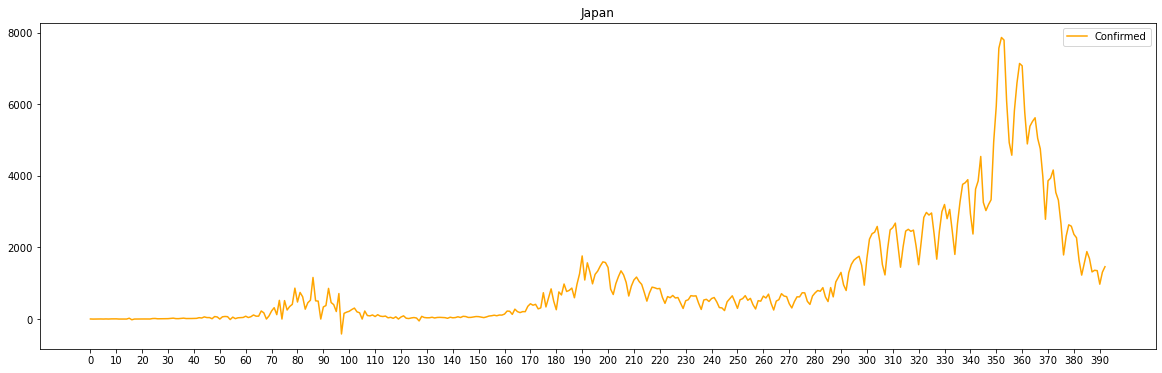

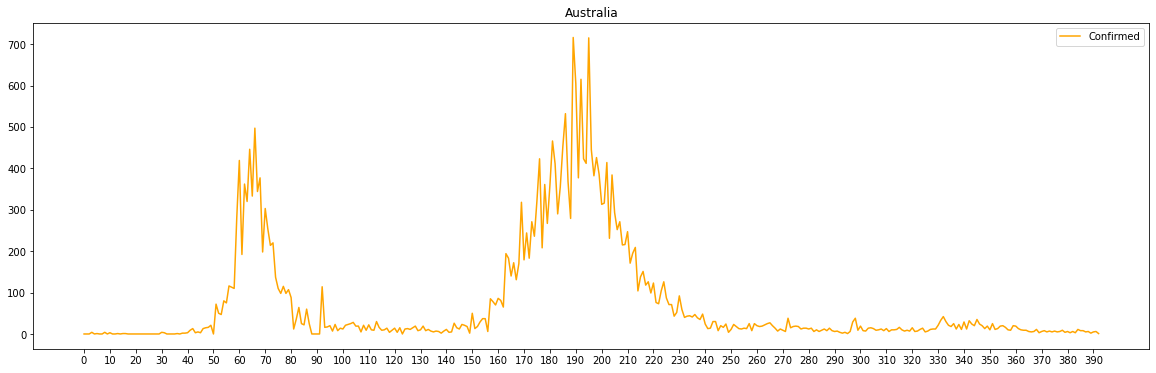

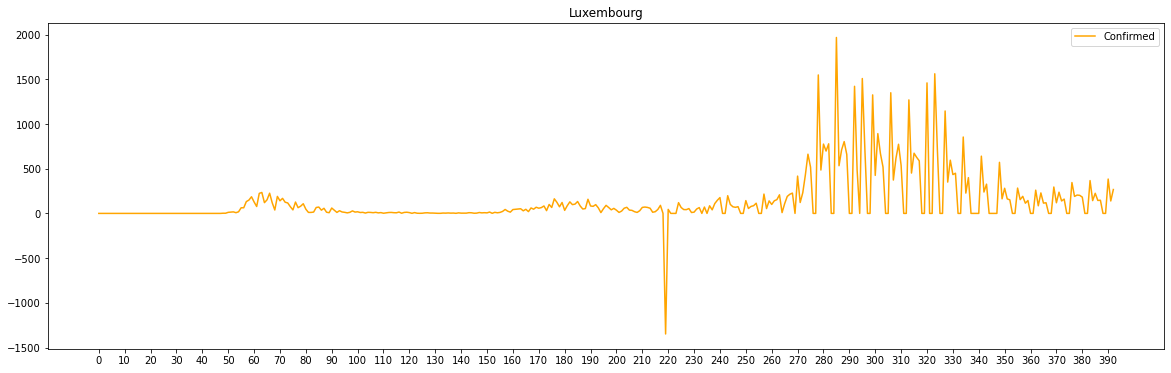

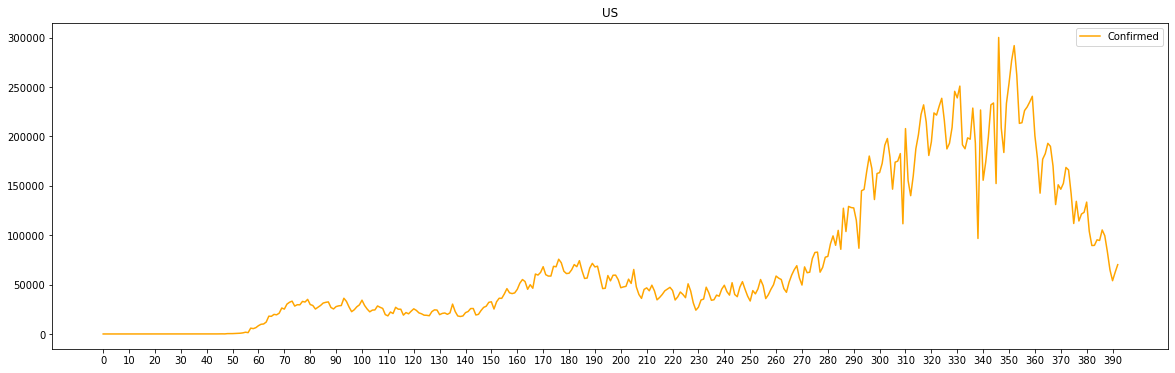

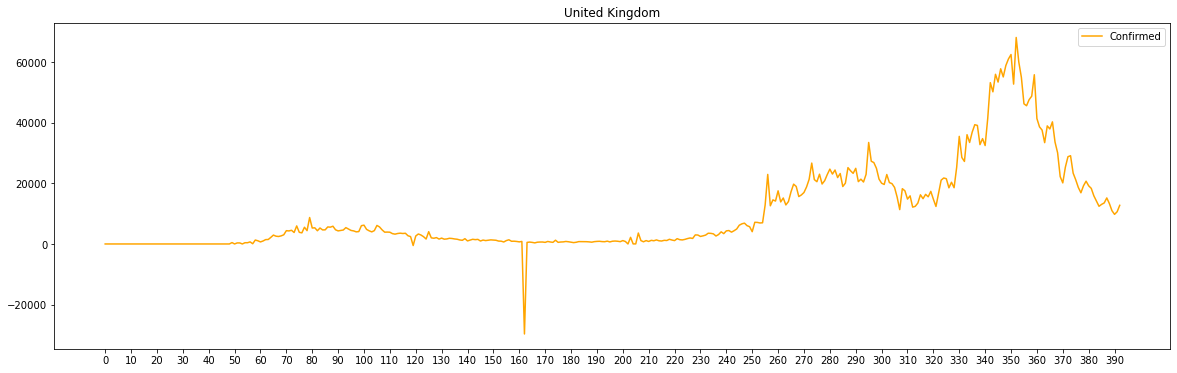

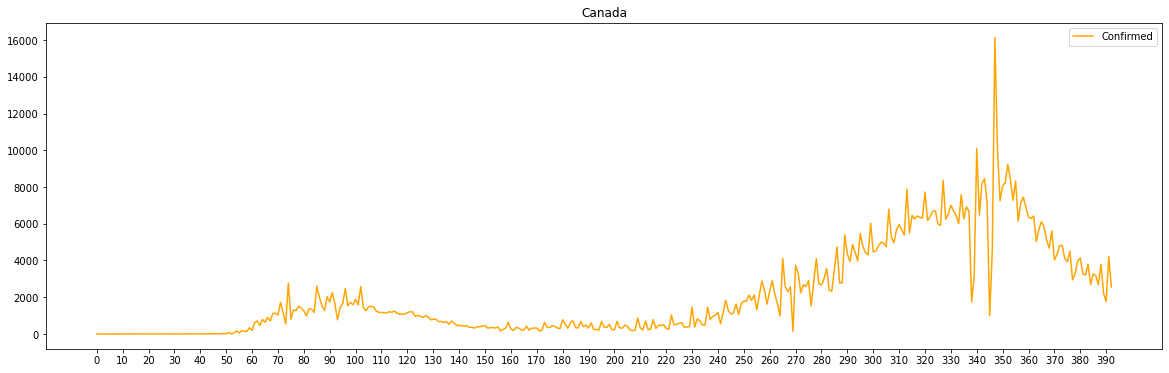

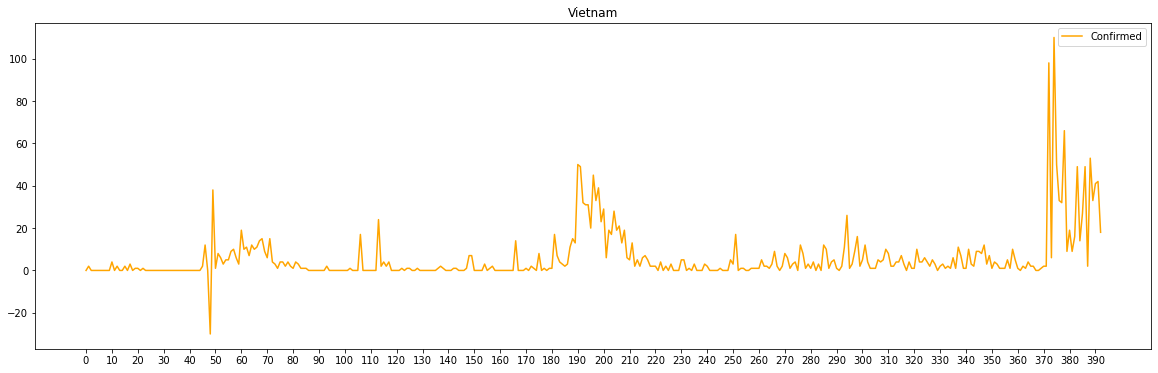

In [11]:
figure = 1
for country in countries:
    plt.figure(figure)
    plt.xticks(np.arange(0, max(x_dat)+1, 10))
    plt.plot(*zip(*y_dat_confirmed_ByDay[country]), color='orange', label='Confirmed')
    plt.title(country)
    figure = figure+1
    plt.legend()

### By observing the above information and the charts, there are some highlights
#### - Day 0 (22.01.2020): there were only 8 countries involved, and after 38 days, this number is increasing up to 63 countries (stand: 29.02.2020)
#### - Day 20 (10.02.2020): there was an increasing change in China,
#### - Day 24-25 (15.02.2020): there were increasing changes in Japan, 5 days later (day 30) (20.02.2020) the similar increasing changes in South Korea and in Italy, and 5 days later (day 35) (25.02.2020) in Germany.
